In [1]:
import scanpy as sc
import pandas as pd
import os
import gc
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
sc.set_figure_params(dpi=80,figsize=['4','4'])
#sc.settings.verbosity = 2

################################################################################################################

In [2]:
def dd(csv_path):
    adata = sc.read_csv(csv_path).T
    adata.obs['Sample'] = csv_path.split('_')[2]
    #sc.pp.filter_genes(adata,min_cells=10)
    sc.pp.filter_cells(adata,min_genes=200)
    sc.pp.filter_cells(adata,min_counts=400)
    #sc.pp.filter_cells(adata,max_genes=7500)
    #sc.pp.filter_cells(adata,max_counts=40000)
    adata.var['mt'] = adata.var_names.str.startswith('MT-')
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'],percent_top=None, log1p=False, inplace=True)
    adata = adata[adata.obs.pct_counts_mt < 10]
    upper_line = np.quantile(adata.obs.n_genes_by_counts.values,.98)
    adata = adata[adata.obs.n_genes_by_counts < upper_line]
    
    #Scrublet去除doublet
    sc.external.pp.scrublet(adata)
    #adata.obs.groupby('Sample')['doublet_score'].describe()
    #adata = adata[~adata.obs.predicted_doublet]
    
    return adata

In [ ]:
os.listdir('../rawdata_test/')

In [3]:
all_samples = []
for file in os.listdir('../rawdata_test/'):
    all_samples.append(dd('../rawdata_test/'+file))
    print('Sample '+file+' completed.')

/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 24.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.7%
Sample GSM5226583_L04cov_raw_counts.csv.gz completed.


/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/external/pp/_scrublet.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_score'] = scrubbed['obs']['doublet_score']
/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.53
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 5.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%
Sample GSM5226582_L03cov_raw_counts.csv.gz completed.


/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/external/pp/_scrublet.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_score'] = scrubbed['obs']['doublet_score']
/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 18.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%
Sample GSM5226581_L01cov_raw_counts.csv.gz completed.


/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/external/pp/_scrublet.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_score'] = scrubbed['obs']['doublet_score']
/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.54
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 30.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
Sample GSM5226574_C51ctr_raw_counts.csv.gz completed.


/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/external/pp/_scrublet.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_score'] = scrubbed['obs']['doublet_score']
/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.34
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 30.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.5%
Sample GSM5226575_C52ctr_raw_counts.csv.gz completed.


/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/external/pp/_scrublet.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_score'] = scrubbed['obs']['doublet_score']
/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.58
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.6%


/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/external/pp/_scrublet.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_score'] = scrubbed['obs']['doublet_score']


Sample GSM5226576_C53ctr_raw_counts.csv.gz completed.


In [4]:
all_samples[0].shape

(3557, 34546)

In [5]:
adata = sc.concat(all_samples)

In [6]:
adata.shape

(28888, 34546)

In [7]:
del all_samples
gc.collect()

3088

In [8]:
from scipy.sparse import csr_matrix
adata.X = csr_matrix(adata.X)

In [9]:
adata.write('../01_cluster/adata_all.h5ad')

# Normalization

In [3]:
adata = sc.read_h5ad('../01_cluster/adata_all.h5ad')

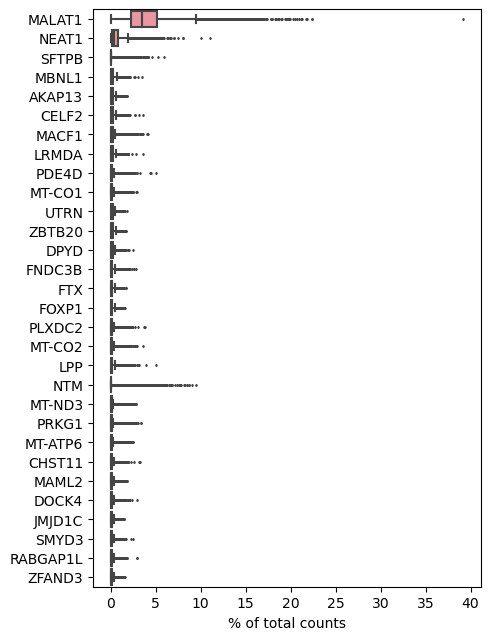

In [5]:
sc.pl.highest_expr_genes(adata)

In [4]:
sc.pp.filter_genes(adata,min_counts=10)

In [14]:
adata.shape

(28888, 26039)

In [5]:
adata = adata[~adata.obs.predicted_doublet]

In [6]:
adata.shape

(28851, 26039)

In [7]:
sc.pp.normalize_total(adata)

/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [8]:
sc.pp.log1p(adata)

In [9]:
sc.pp.highly_variable_genes(adata, batch_key='Sample',n_top_genes=6000)

/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:4

In [10]:
adata.raw = adata

In [11]:
adata = adata[:,adata.var.highly_variable]

In [26]:
adata.shape

(28851, 6000)

In [ ]:
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [12]:
sc.pp.scale(adata)

/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [13]:
sc.tl.pca(adata)

In [30]:
 %matplotlib inline 

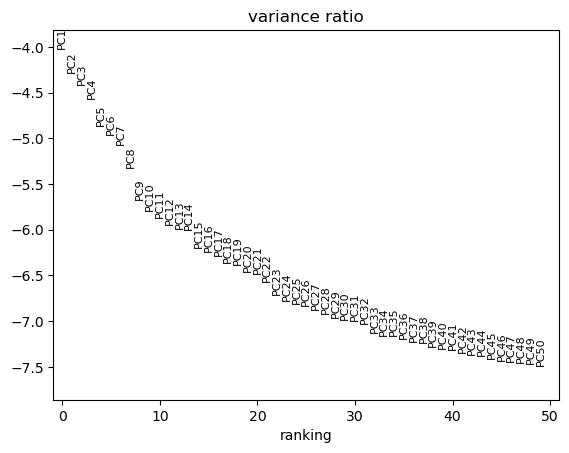

In [31]:
sc.pl.pca_variance_ratio(adata, log=True,n_pcs=50)

In [14]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

In [15]:
sc.tl.umap(adata)

/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


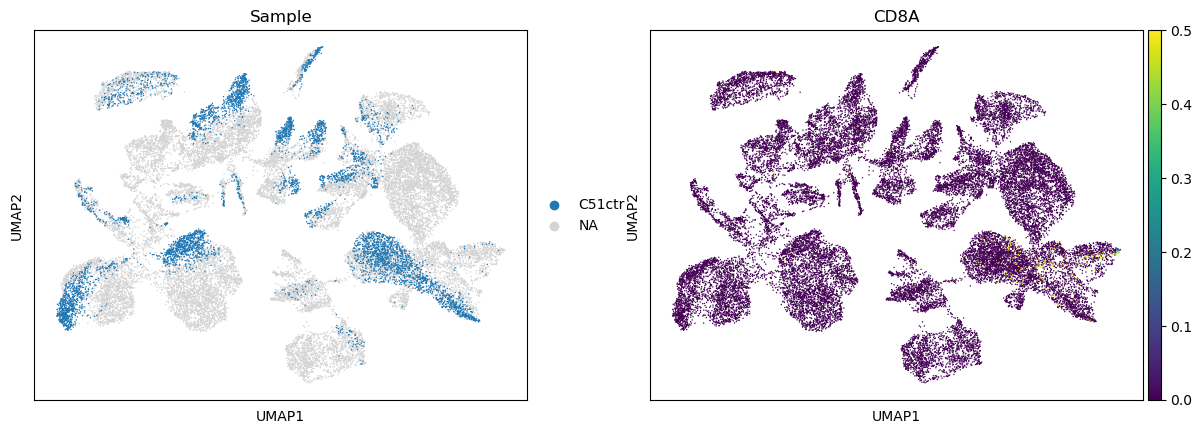

In [17]:
sc.pl.umap(adata, color=['Sample','CD8A'],use_raw=True, vmax=0.5, groups='C51ctr')

In [18]:
sc.external.pp.bbknn(adata, batch_key='Sample')

In [19]:
sc.tl.umap(adata)

/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/home/ak/miniconda3/envs/py3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


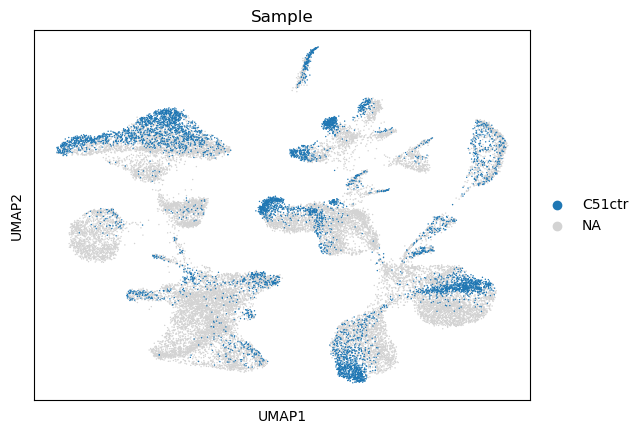

In [20]:
sc.pl.umap(adata, color=['Sample'], vmax=0.3,groups='C51ctr')

In [ ]:
adata.raw.shape

In [ ]:
adata.write('../01_cluster/adata_all_umap_finished.h5ad')

In [2]:
adata = sc.read_h5ad('../01_cluster/adata_all_umap_finished.h5ad')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../01_cluster/adata_all_umap_finished.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
sc.tl.leiden(adata, resolution=0.8)

In [ ]:
def map_condition(a):
    if 'cov' in a:
        return 'COVID19'
    else:
        return 'Control'

In [ ]:
type(adata.obs.sample)

In [ ]:
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
adata.obs.Sample.map()